In [1]:
#not sure if i will use all them
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import glob
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison


In [2]:
data_suspicious =pd.read_csv('account_interaction_susp_counts.csv')
data_all = pd.read_csv('all_interaction.csv')

In [3]:
data_all['ratio'] = data_all['unique_sum']/data_all['cnt_tx']

In [4]:
data_suspicious['ratio'] = data_suspicious['unique_sum']/data_suspicious['cnt_tx']

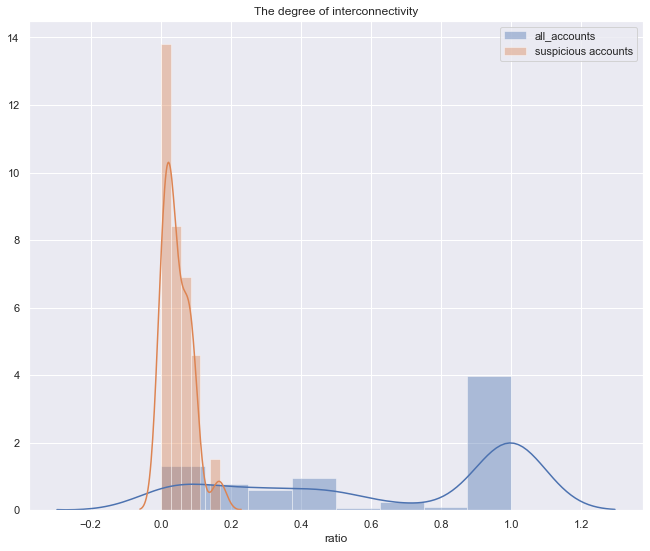

In [5]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(data_all.ratio, ax=ax, label='all_accounts')
sns.distplot(data_suspicious.ratio, ax=ax, label='suspicious accounts')
plt.title('The degree of interconnectivity')
plt.legend()

In [6]:
validators = ['0xaA84378fA41da83a9B6523bA46E45A664FbEBFC8',
             '0x8De281f47B137979e55B6CEa598179737574C774',
             '0x841C25A1b2bA723591c14636Dc13E4deeb65A79b',
             '0x1eF319dB1930e3420fCfF90c376d9cf515B34876',
             '0xAcFfb14f786a485ab7F3fef5D9F092A69F929CA4',
             '0x2fa6f57FF56A1DA41FB7C6a176F630641e20Cd53',
             '0xe659bc6A60Ba2091c08F7df623BA6057349B6980',
             '0x6e7215893131bF41Af6256B5Cf0bD61BD631B796',
             '0x9583259D41D3409a11e73addAdC399f391e7957d',
             '0xc463396d13C115A443c1989b883823FA538371e5',
             '0x60B038A423272609807AFB59Bfd4EdEdd8938F48',
             '0x93dA5507a26090448a03FC1F77e1C7DA20A24292',
             '0x4c9025702e79819ed86FA1546BF30eb8c6332bd6',
             '0xF0f659e9ec6B4358A8d7FbA6a0CA79bAADe10552',
             '0xdDdCb89201F5A24891610b033351a5408A081f98',
             '0xEafe556569895f555755815131D21D49AFdb2Efe',
             '0x738e6E88d4415E2e5075e15CC24FD9416F1c89C3',
             '0x8823A9E567BAC419c394c646E1d2F0929D2039ee',
             '0xc3e8a903c73089979465B8eD0dB6bC17DD610021',
             '0x63fb9AaB8BcD1837d8D1A5318b73b1d4Adc4Fc6a',
             '0x37D1B7a3EEc870e593C32d790E52B89908cA90F1',
             '0xAA4870919390F1026C17651B4F8f29CBc50fD789',
             '0x2eaeA0039C54f63CC344C3eAacfE69421C7eE785',
             '0x014453772982e667D3913dDa9CE09d0FCE3bF97a',
             '0x2e8Eb0126F6CA909520c394677D22196BFC82741',
             '0xeE4308865D6B23AFd70B7108a35Dea8D6481Bbc2',
             '0xc0f8226542D33900EbAae1a5200c71d1b1F34D9E',
             '0x9CA00a5b1B61157D5D75F0c41cdDb157dD050d71']

In [7]:
data_suspicious_updated =data_suspicious[~data_suspicious.address.isin(validators)]

In [8]:
data_all_updated= data_all[~data_all.address.isin(validators)]

In [9]:
data_all_updated

#you might exclude the known contract addresses as well: 0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088	
#think about it

,Unnamed: 0,address,unique_to,unique_from,unique_sum,cnt_tx,ratio
0,0,0xaB59A1ea1aC9af9F77518b9B4AD80942adE35088,251,0,251,53653,0.004678
1,1,0xD748BF41264b906093460923169643f45BDbC32e,90,2,92,559,0.164580
2,2,0xf9f4EF25373E0dabdd80eed7299Fd5234F7D4d89,1,1,2,3,0.666667
3,3,0xf83F0DAe831B9323850b8149cd46AF48d8b996a1,3,1,4,6,0.666667
4,4,0x814b1b9d07C3b471DbF6E8b8BAc91954921aEc64,2,1,3,4,0.750000
...,...,...,...,...,...,...,...
1307,1307,0x95Ae66C2413033556c67eC3fCDc7f01a2fF5D385,0,2,2,8,0.250000
1308,1308,0xC5B3B9b457233f912bE52345e4E02286A9bEbb1e,0,3,3,6,0.500000
1309,1309,0x539567026E0aA9BB3178e4C2bf7994FCc5617548,0,143,143,146,0.979452
1310,1310,0xe30ba6eD8D41165D240abA5052609569BC68a8dC,0,144,144,153,0.941176


In [10]:
address_suspicious =data_suspicious_updated['address']

In [11]:
#exclude the suspicious accounts from the normal data
data_all_updated_2= data_all_updated[~data_all_updated.address.isin(address_suspicious)]

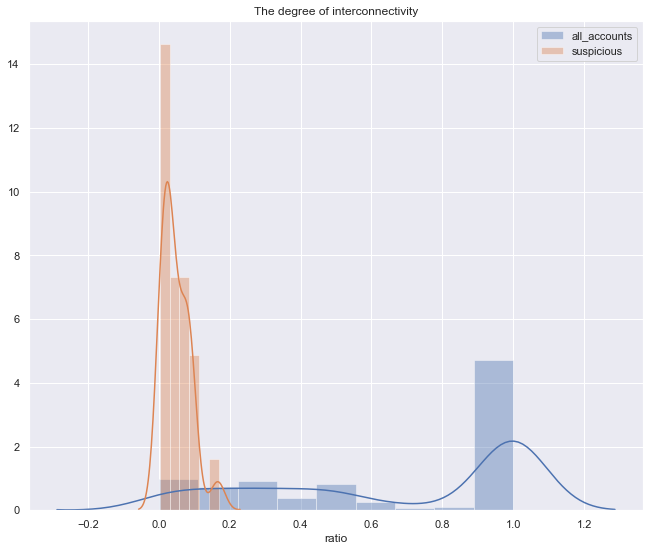

In [12]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(data_all_updated_2.ratio, ax=ax, label='all_accounts')
sns.distplot(data_suspicious_updated.ratio, ax=ax, label='suspicious')
plt.title('The degree of interconnectivity')
plt.legend()

In [13]:
#let's make a single dataframe and add one columns to define the status of the address: suspicious or normal
group_suspicious = data_all[data_all.address.isin(address_suspicious)]
group_suspicious['status']='suspicious'

group_normal=data_all_updated_2
group_normal['status']='normal'

groups= [group_suspicious, group_normal]
groups=pd.concat(groups)

/Users/nwittek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nwittek/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


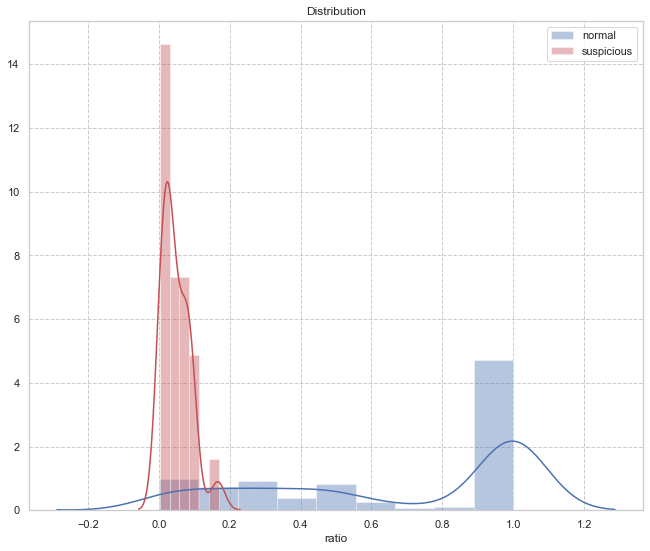

In [14]:
#possible to make distribition graph again:
sns.set_style("whitegrid", {
    "ytick.major.size": 0.1,
    "ytick.minor.size": 0.05,
    'grid.linestyle': '--'
 })
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(groups[groups.status == 'normal'].ratio, ax=ax, label='normal',color='b')
sns.distplot(groups[groups.status == 'suspicious'].ratio, ax=ax, label='suspicious',color='r')
plt.title('Distribution')
plt.legend()

In [15]:
#here is the stats:

mod = ols('ratio ~ status',data=groups).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('comparison')
print('----------------------')
print(aov_table)
print()


comparison
----------------------
              sum_sq      df           F        PR(>F)
status     16.407789     1.0  120.178048  8.575519e-27
Residual  175.030177  1282.0         NaN           NaN



In [16]:
#lets select 44 points from the normal data set
sampler= data_all_updated_2.sample(n = 44) 

In [17]:
group2= (sampler,group_suspicious)
group2=pd.concat(group2)

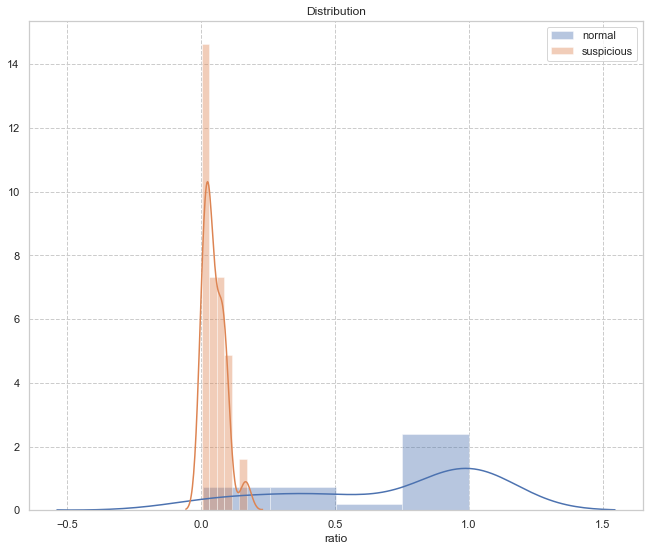

In [18]:
f, ax = plt.subplots(figsize=(11,9))
sns.distplot(group2[group2.status == 'normal'].ratio, ax=ax, label='normal')
sns.distplot(group2[group2.status == 'suspicious'].ratio, ax=ax, label='suspicious')
plt.title('Distribution')
plt.legend()

In [19]:
mod = ols('ratio ~ status',data=group2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print('comparison')
print('----------------------')
print(aov_table)
print()


comparison
----------------------
            sum_sq    df           F        PR(>F)
status    9.903081   1.0  146.285942  2.988343e-20
Residual  5.821919  86.0         NaN           NaN



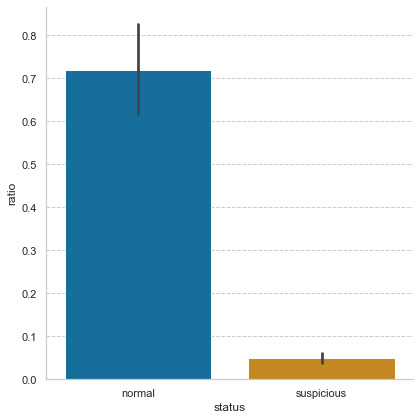

In [22]:
#comparison between the sampler and the suspicious accounts
sns.catplot(x="status", y="ratio", data=group2,
                height=6, kind="bar", palette="colorblind")

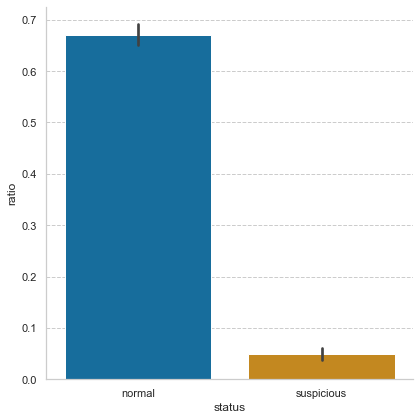

In [26]:
sns.catplot(x="status", y="ratio", data=groups,
                height=6, kind="bar", palette="colorblind",order=['normal','suspicious'])